## Тест на однородность

Импортируем необходимые модули

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

Импортируем данные.

In [5]:
data=pd.read_excel('Companies.xls')
data

,CompanyA1,CompanyA2,CompanyA3,CompanyB1,CompanyB2,CompanyB3
Case1,9,8,1,1,3,8
Case2,6,8,0,6,8,9
Case3,7,5,9,6,6,0
Case4,7,2,8,6,4,0
Case5,9,6,6,7,5,2
Case6,6,8,3,4,2,3
Case7,7,7,0,5,0,4
Case8,6,1,8,4,2,6
Case9,7,8,1,6,8,9
Case10,2,3,1,5,5,4


F-тест проверки равенства дисперсий:

In [63]:
def f_test(vec_1, vec_2):
    var_1=np.var(vec_1)
    var_2=np.var(vec_2)
    if var_1<var_2:
        var_2, var_1=var_1, var_2
    F=var_1/var_2
    p_val=1-st.f.cdf(F, len(vec_1)-1, len(vec_2)-1)
    return F, p_val

Создадим таблицы результатов для F-теста и t-теста:

In [64]:
A_comps=['CompanyA'+str(x) for x in range(1,4)]
B_comps=['CompanyB'+str(x) for x in range(1,4)]

tround=lambda x: np.round(x, decimals=3)

f_result=pd.DataFrame(columns=A_comps, index=B_comps)
t_result=pd.DataFrame(columns=A_comps, index=B_comps)
for a_comp in A_comps:
    for b_comp in B_comps:
        f_stat, f_pval=f_test(data[a_comp], data[b_comp])
        t_stat, t_pval=st.ttest_ind(data[a_comp], data[b_comp])
        
        f_result.loc[b_comp, a_comp]=('F-stat: '+str(tround(f_stat))+' p-val: '+str(tround(f_pval)))
        t_result.loc[b_comp, a_comp]=('t-stat: '+str(tround(t_stat))+' p-val: '+str(tround(t_pval)))

Среднее и смещенная дисперсия для каждой компании:

In [62]:
data.describe().loc[['mean']].append(pd.Series([np.var(data[x], ddof=1) for x in data.columns], name='var', index=data.columns))

,CompanyA1,CompanyA2,CompanyA3,CompanyB1,CompanyB2,CompanyB3
mean,6.285714,5.464286,3.357143,5.464286,3.821429,4.571429
var,4.359788,8.924603,8.015873,3.369048,7.337302,9.957672


Результаты F-теста:

In [65]:
f_result

,CompanyA1,CompanyA2,CompanyA3
CompanyB1,F-stat: 1.294 p-val: 0.254,F-stat: 2.649 p-val: 0.007,F-stat: 2.379 p-val: 0.014
CompanyB2,F-stat: 1.683 p-val: 0.091,F-stat: 1.216 p-val: 0.307,F-stat: 1.092 p-val: 0.41
CompanyB3,F-stat: 2.284 p-val: 0.018,F-stat: 1.116 p-val: 0.389,F-stat: 1.242 p-val: 0.288


Результаты t-теста:

In [66]:
t_result

,CompanyA1,CompanyA2,CompanyA3
CompanyB1,t-stat: 1.563 p-val: 0.124,t-stat: 0.0 p-val: 1.0,t-stat: -3.305 p-val: 0.002
CompanyB2,t-stat: 3.813 p-val: 0.0,t-stat: 2.156 p-val: 0.036,t-stat: -0.627 p-val: 0.533
CompanyB3,t-stat: 2.397 p-val: 0.02,t-stat: 1.087 p-val: 0.282,t-stat: -1.516 p-val: 0.135


Проанализировав результаты, выделим 3 группы сравнений (уровень значимости 0.05):

**1.) Дисперсии равны, средние равны.**

CompanyA1-CompanyB1

CompanyA2-CompanyB3

CompanyA3-CompanyB2

CompanyA3-CompanyB3

**2.) Дисперсии равны, средние различны**

CompanyA1-CompanyB2

CompanyA2-CompanyB2

**3.) Дисперсии неравны, средние равны**

CompanyA1-CompanyB3

CompanyA3-CompanyB1

Заметим, что в третьем случае мы не можем утверждать, что средние выборок равны, поскольку t-тест требует равенства дисперсий.

Сравнение CompanyA2-CompanyB1 не вошло в данные группы, дисперсии здесь различны, но средние одинаковы.

## Boxplots для группы сравнений 1

In [110]:
1.96*st.sem(data['CompanyA1'])

0.77340995788971

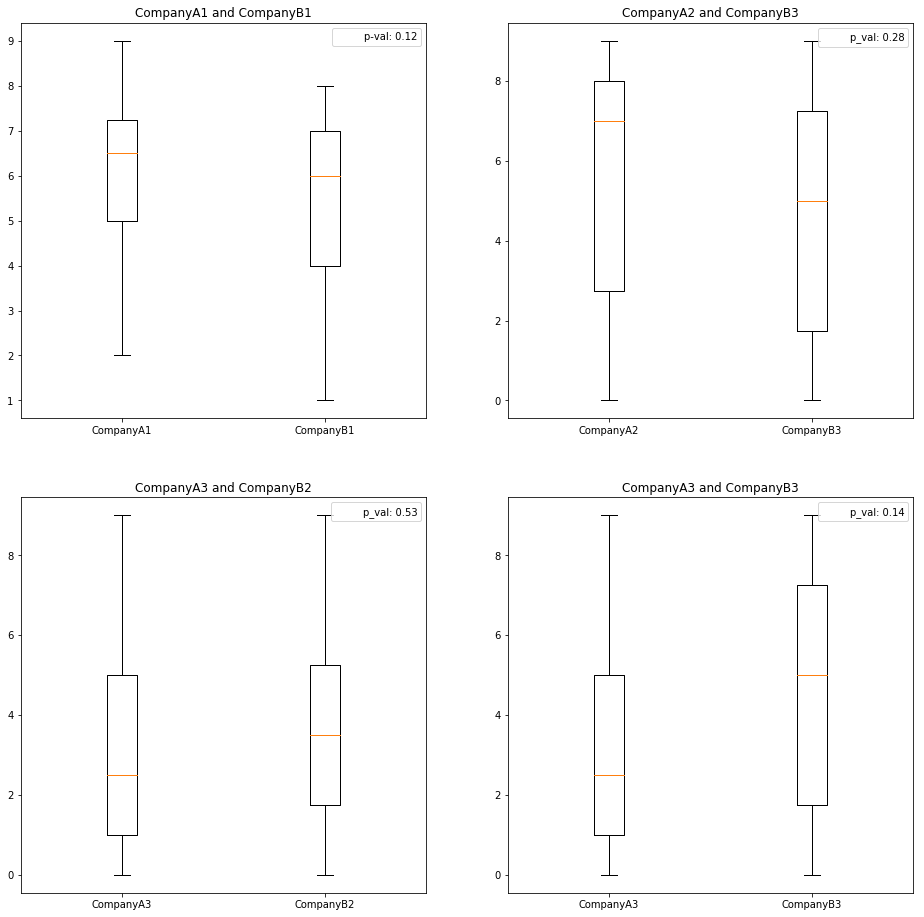

In [146]:
import matplotlib.patches as ptch
f, axarr=plt.subplots(2,2)
f.set_size_inches([16, 16])
axarr[0,0].boxplot([data['CompanyA1'], data['CompanyB1']], labels=['CompanyA1', 'CompanyB1'])
axarr[0,0].set_title('CompanyA1 and CompanyB1')
red_patch = ptch.Patch(color='w', label='p-val: 0.12')
axarr[0,0].legend(handles=[red_patch], loc=1)

axarr[0,1].boxplot([data['CompanyA2'], data['CompanyB3']], labels=['CompanyA2', 'CompanyB3'])
axarr[0,1].set_title('CompanyA2 and CompanyB3')
red_patch = ptch.Patch(color='w', label='p_val: 0.28')
axarr[0,1].legend(handles=[red_patch], loc=1)

axarr[1,0].boxplot([data['CompanyA3'], data['CompanyB2']], labels=['CompanyA3', 'CompanyB2'])
axarr[1,0].set_title('CompanyA3 and CompanyB2')
red_patch = ptch.Patch(color='w', label='p_val: 0.53')
axarr[1,0].legend(handles=[red_patch], loc=1)

axarr[1,1].boxplot([data['CompanyA3'], data['CompanyB3']], labels=['CompanyA3', 'CompanyB3'])
_=axarr[1,1].set_title('CompanyA3 and CompanyB3')
red_patch = ptch.Patch(color='w', label='p_val: 0.14')
_=axarr[1,1].legend(handles=[red_patch], loc=1)

На данных графиках усы простираются до последних значений, меньших, чем 1.5 межквантильных размаха от третьего выборочного квантиля вверх и от верхней границы первого выборочного квартиля вниз.

Также приведены p-values для t-теста на равенство средних.

Построим графики, где усы простираются на 1.96 стандартных ошибок среднего. Выборочное среднее распределено нормально. Площадь под кривой плотности нормального распределения на интервале [среднее-1.96*std, среднее+1.96*std] равна 0.95. Таким образом, строя усы от выборочного среднего на 1.96 его стандартных ошибок, мы получаем 95% доверительный интервал для среднего генеральной совокупности.

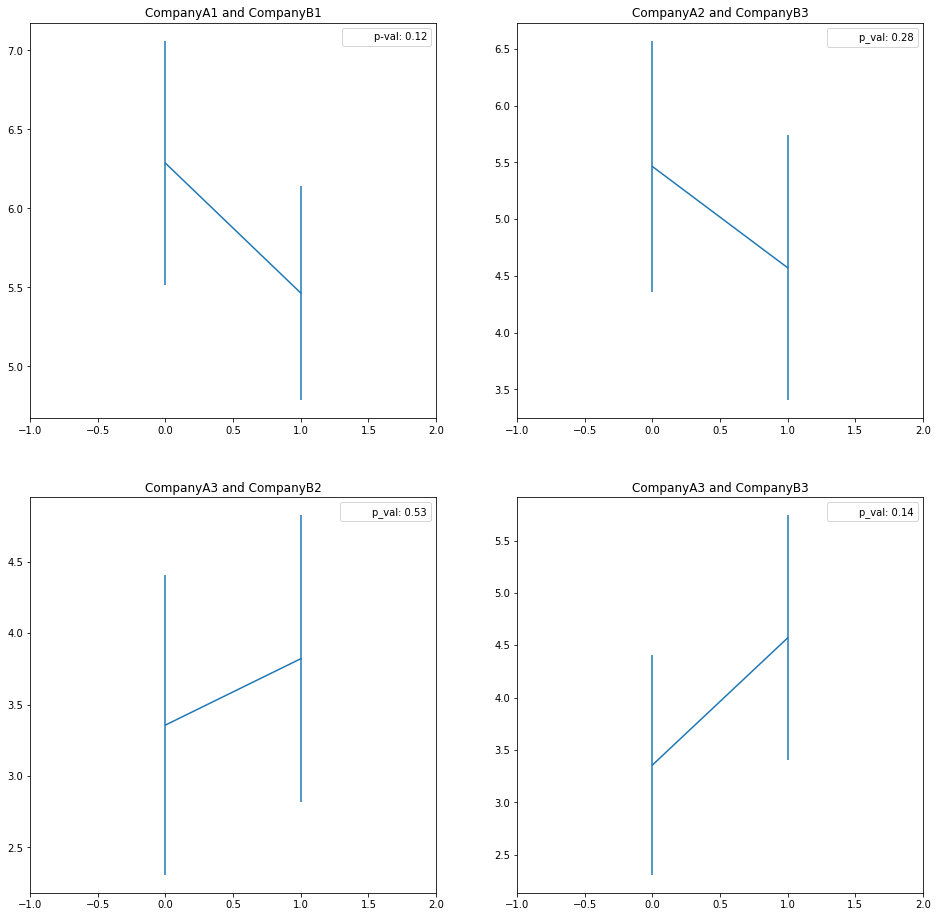

In [152]:
import matplotlib.patches as ptch
f, axarr=plt.subplots(2,2)
f.set_size_inches([16, 16])
axarr[0,0].set_xlim(-1, 2)
axarr[0,0].errorbar([0,1], [np.mean(data['CompanyA1']), np.mean(data['CompanyB1'])], 
                    yerr=[1.96*st.sem(data['CompanyA1']), 1.96*st.sem(data['CompanyB1'])])
axarr[0,0].set_title('CompanyA1 and CompanyB1')
red_patch = ptch.Patch(color='w', label='p-val: 0.12')
axarr[0,0].legend(handles=[red_patch], loc=1)

axarr[0,1].set_xlim(-1, 2)
axarr[0,1].errorbar([0,1], [np.mean(data['CompanyA2']), np.mean(data['CompanyB3'])], 
                   yerr=[1.96*st.sem(data['CompanyA2']), 1.96*st.sem(data['CompanyB3'])])
axarr[0,1].set_title('CompanyA2 and CompanyB3')
red_patch = ptch.Patch(color='w', label='p_val: 0.28')
axarr[0,1].legend(handles=[red_patch], loc=1)

axarr[1,0].set_xlim(-1, 2)
axarr[1,0].errorbar([0,1],[np.mean(data['CompanyA3']), np.mean(data['CompanyB2'])], 
                  yerr=[1.96*st.sem(data['CompanyA3']), 1.96*st.sem(data['CompanyB2'])])
axarr[1,0].set_title('CompanyA3 and CompanyB2')
red_patch = ptch.Patch(color='w', label='p_val: 0.53')
axarr[1,0].legend(handles=[red_patch], loc=1)

axarr[1,1].set_xlim(-1, 2)
axarr[1,1].errorbar([0,1],[np.mean(data['CompanyA3']), np.mean(data['CompanyB3'])], 
                   yerr=[1.96*st.sem(data['CompanyA3']), 1.96*st.sem(data['CompanyB3'])])
_=axarr[1,1].set_title('CompanyA3 and CompanyB3')
red_patch = ptch.Patch(color='w', label='p_val: 0.14')
_=axarr[1,1].legend(handles=[red_patch], loc=1)

Видно, что средние выборок покрываются доверительными интервалами друг друга.

## Boxplots для группы сравнений 2

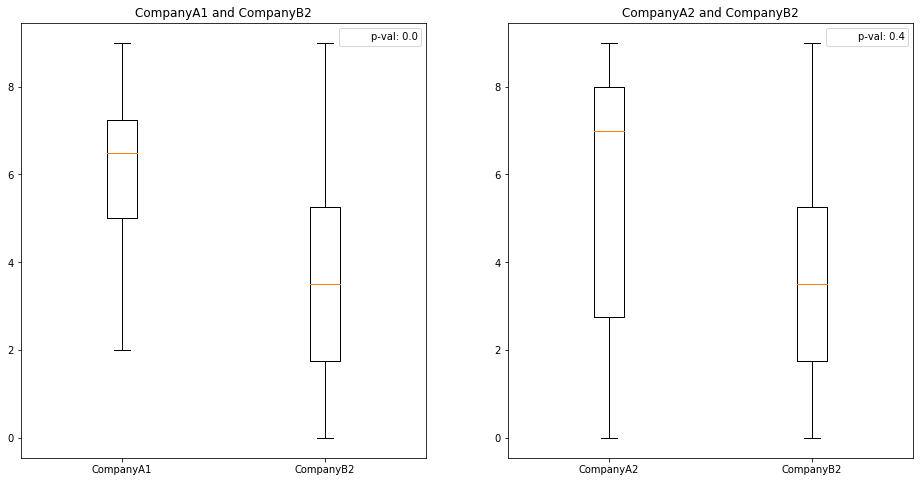

In [154]:
f, axarr=plt.subplots(1,2)
f.set_size_inches([16, 8])
axarr[0].boxplot([data['CompanyA1'], data['CompanyB2']], labels=['CompanyA1', 'CompanyB2'])
axarr[0].set_title('CompanyA1 and CompanyB2')
red_patch = ptch.Patch(color='w', label='p-val: 0.0')
axarr[0].legend(handles=[red_patch], loc=1)

axarr[1].boxplot([data['CompanyA2'], data['CompanyB2']], labels=['CompanyA2', 'CompanyB2'])
_=axarr[1].set_title('CompanyA2 and CompanyB2')
red_patch = ptch.Patch(color='w', label='p-val: 0.4')
_=axarr[1].legend(handles=[red_patch], loc=1)

Построим графики с доверительными интервалами:

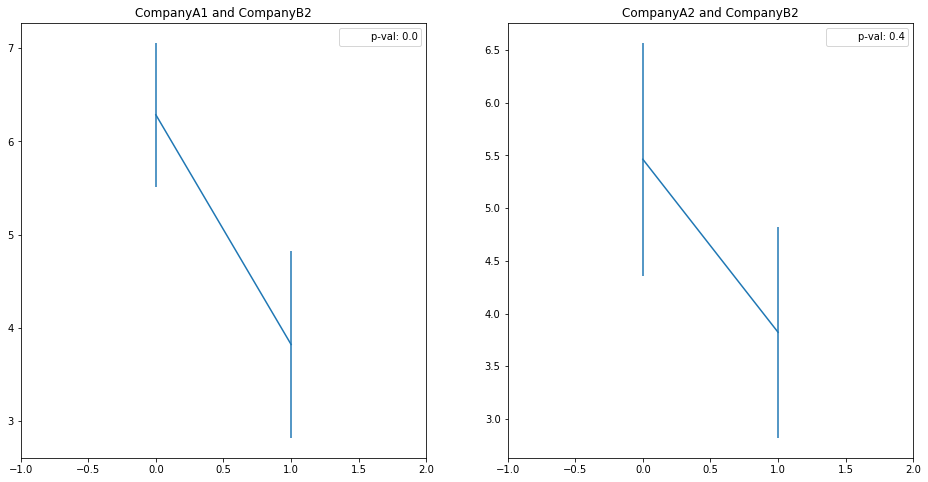

In [156]:
f, axarr=plt.subplots(1,2)
f.set_size_inches([16, 8])
axarr[0].set_xlim([-1, 2])
axarr[0].errorbar([0,1], [data['CompanyA1'].mean(), data['CompanyB2'].mean()], 
                  yerr=[1.96*st.sem(data['CompanyA1']), 1.96*st.sem(data['CompanyB2'])])
axarr[0].set_title('CompanyA1 and CompanyB2')
red_patch = ptch.Patch(color='w', label='p-val: 0.0')
axarr[0].legend(handles=[red_patch], loc=1)

axarr[1].set_xlim([-1, 2])
axarr[1].errorbar([0,1], [data['CompanyA2'].mean(), data['CompanyB2'].mean()], 
                 yerr=[1.96*st.sem(data['CompanyA2']), 1.96*st.sem(data['CompanyB2'])])
_=axarr[1].set_title('CompanyA2 and CompanyB2')
red_patch = ptch.Patch(color='w', label='p-val: 0.4')
_=axarr[1].legend(handles=[red_patch], loc=1)

Здесь, средние не покрываются доверительными интервалами.

## Boxplots для группы сравнений 3

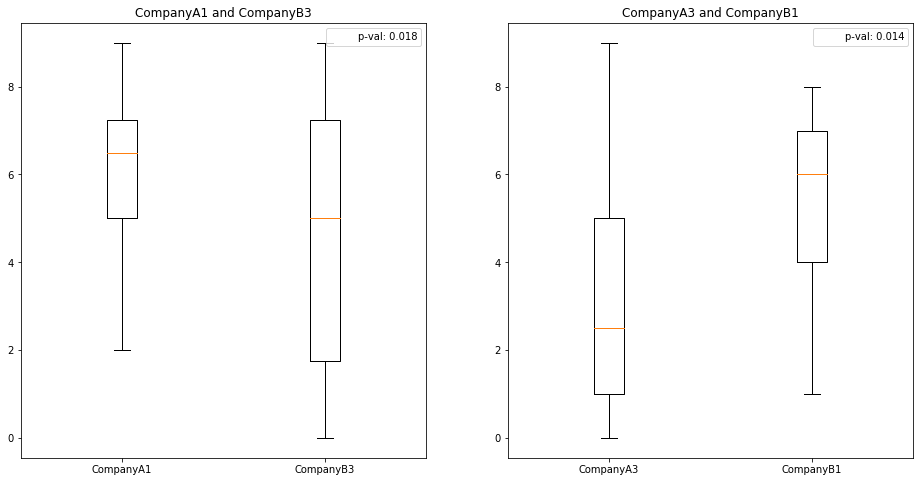

In [159]:
f, axarr=plt.subplots(1,2)
f.set_size_inches([16, 8])
axarr[0].boxplot([data['CompanyA1'], data['CompanyB3']], labels=['CompanyA1', 'CompanyB3'])
axarr[0].set_title('CompanyA1 and CompanyB3')
red_patch = ptch.Patch(color='w', label='p-val: 0.018')
axarr[0].legend(handles=[red_patch], loc=1)

axarr[1].boxplot([data['CompanyA3'], data['CompanyB1']], labels=['CompanyA3', 'CompanyB1'])
_=axarr[1].set_title('CompanyA3 and CompanyB1')
red_patch = ptch.Patch(color='w', label='p-val: 0.014')
_=axarr[1].legend(handles=[red_patch], loc=1)

На данных графиках приведены p-values для F-теста, так как t-тест здесь не имеет смысла из-за различных дисперсий в выборках.

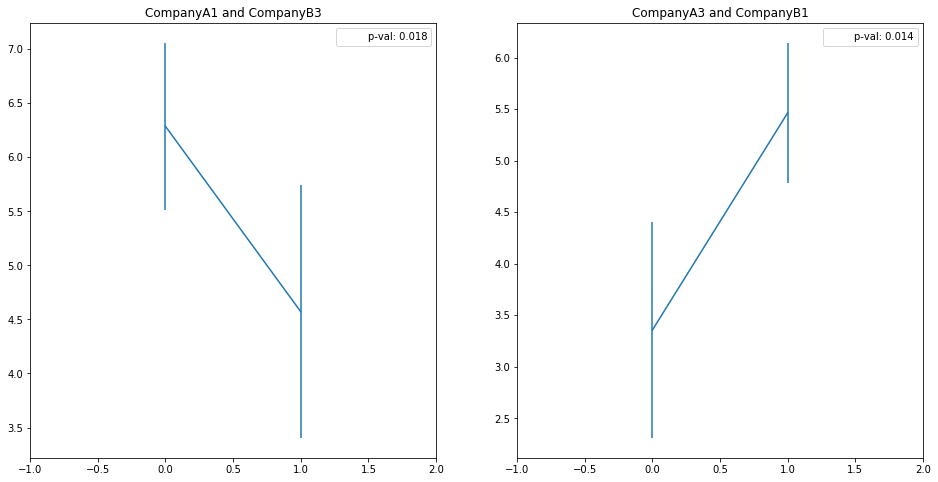

In [160]:
f, axarr=plt.subplots(1,2)
f.set_size_inches([16, 8])
axarr[0].set_xlim([-1, 2])
axarr[0].errorbar([0,1], [data['CompanyA1'].mean(), data['CompanyB3'].mean()], 
                  yerr=[1.96*st.sem(data['CompanyA1']), 1.96*st.sem(data['CompanyB3'])])
axarr[0].set_title('CompanyA1 and CompanyB3')
red_patch = ptch.Patch(color='w', label='p-val: 0.018')
axarr[0].legend(handles=[red_patch], loc=1)

axarr[1].set_xlim([-1, 2])
axarr[1].errorbar([0,1], [data['CompanyA3'].mean(), data['CompanyB1'].mean()], 
                 yerr=[1.96*st.sem(data['CompanyA3']), 1.96*st.sem(data['CompanyB1'])])
_=axarr[1].set_title('CompanyA3 and CompanyB1')
red_patch = ptch.Patch(color='w', label='p-val: 0.014')
_=axarr[1].legend(handles=[red_patch], loc=1)